In [1]:
import numpy as np
import pandas as pd
import obspy
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import scipy

In [2]:
file_name1 = 'II.PFO.00.BHZ_2005-02-03T04_50_58.974_2005-02-03T04_53_09.974'
file_name2 = 'II.PFO.00.BHZ_2018-11-08T17_15_15.269_2018-11-08T17_17_26.269'
file_name3 = 'II.PFO.00.BHZ_2014-01-15T09_33_57.410_2014-01-15T09_36_08.410'
file_name4 = 'II.PFO.00.BHZ_2017-06-07T07_11_02.617_2017-06-07T07_13_13.617'
file_name5 = 'II.PFO.00.BHZ_2007-11-25T20_29_15.793_2007-11-25T20_31_26.793'

In [3]:
st1 = obspy.read("pyweed\pyweed\\"+ file_name1 + ".mseed")
st2 = obspy.read("pyweed\pyweed\\"+ file_name2 + ".mseed")
st3 = obspy.read("pyweed\pyweed\\"+ file_name3 + ".mseed")
st4 = obspy.read("pyweed\pyweed\\"+ file_name4 + ".mseed")
st5 = obspy.read("pyweed\pyweed\\"+ file_name5 + ".mseed")

In [4]:
st1.detrend('constant')
st2.detrend('constant')
st3.detrend('constant')
st4.detrend('constant')
st5.detrend('constant')

1 Trace(s) in Stream:
II.PFO.00.BHZ | 2007-11-25T20:29:15.799900Z - 2007-11-25T20:31:26.749900Z | 20.0 Hz, 2620 samples

In [5]:
tr1 = st1.traces[0].copy()
tr2 = st2.traces[0].copy()
tr3 = st3.traces[0].copy()
tr4 = st4.traces[0].copy()
tr5 = st5.traces[0].copy()

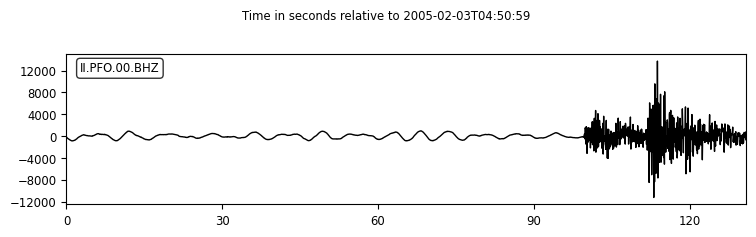

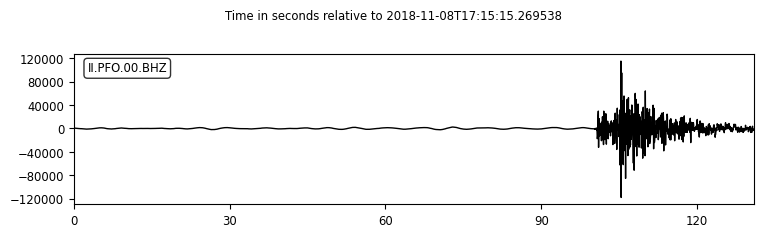

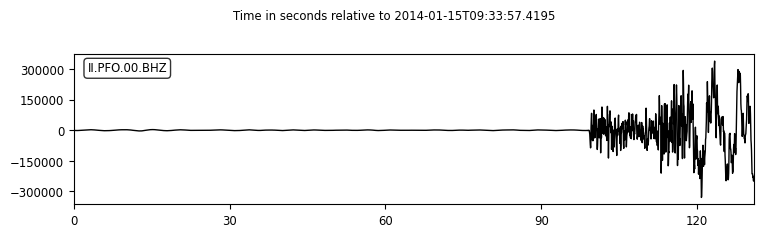

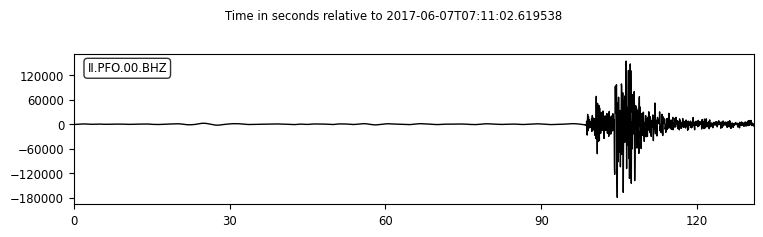

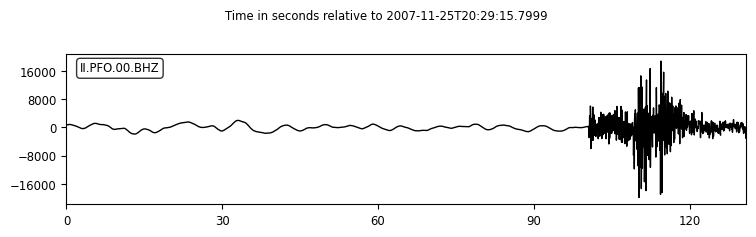

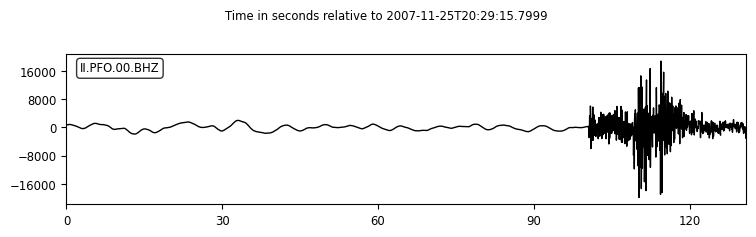

In [6]:
tr1.plot(type="relative")
tr2.plot(type="relative")
tr3.plot(type="relative")
tr4.plot(type="relative")
tr5.plot(type="relative")

In [7]:
tr1_filt = tr1.copy()
tr1_filt.filter('highpass', freq=1, corners=2, zerophase=True)
tr2_filt = tr2.copy()
tr2_filt.filter('highpass', freq=1, corners=2, zerophase=True)
tr3_filt = tr3.copy()
tr3_filt.filter('highpass', freq=1, corners=2, zerophase=True)
tr4_filt = tr4.copy()
tr4_filt.filter('highpass', freq=1, corners=2, zerophase=True)
tr5_filt = tr5.copy()
tr5_filt.filter('highpass', freq=1, corners=2, zerophase=True)

II.PFO.00.BHZ | 2007-11-25T20:29:15.799900Z - 2007-11-25T20:31:26.749900Z | 20.0 Hz, 2620 samples

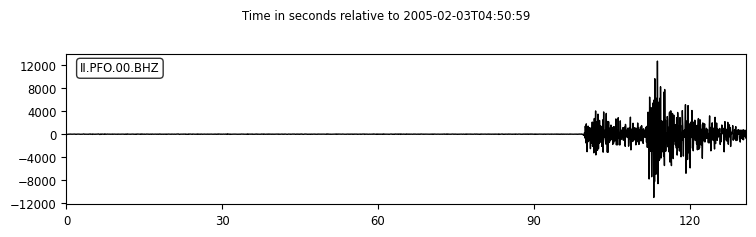

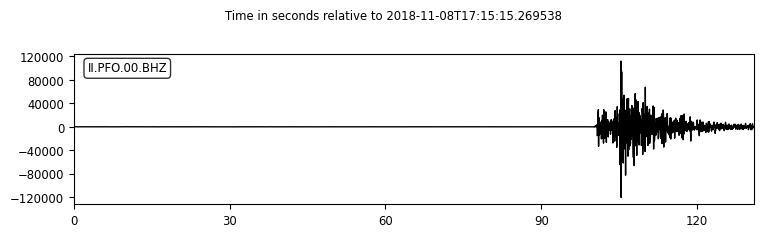

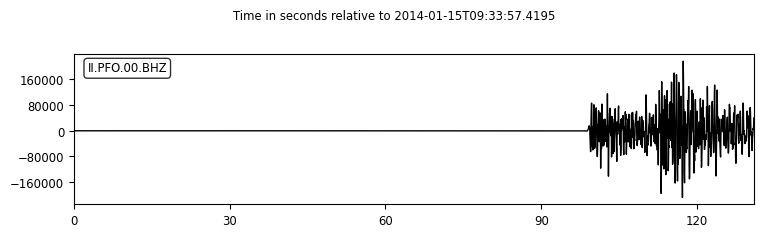

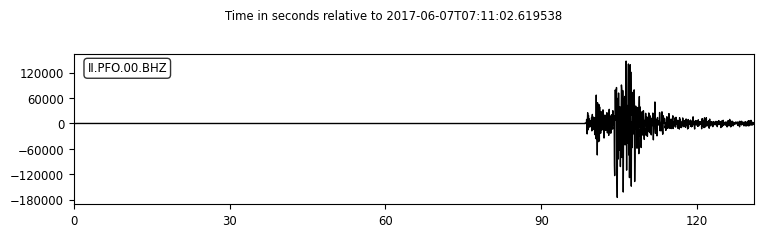

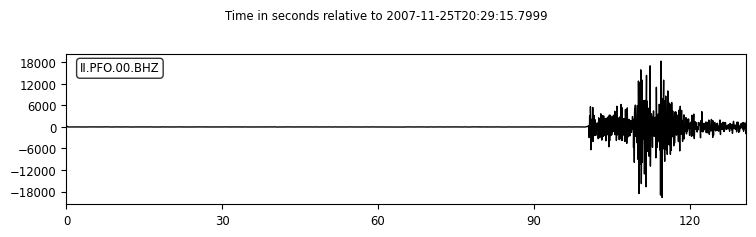

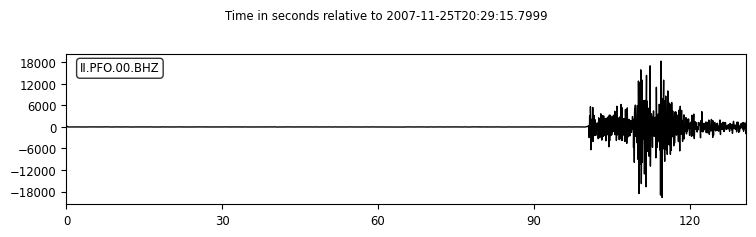

In [8]:
tr1_filt.plot(type="relative")
tr2_filt.plot(type="relative")
tr3_filt.plot(type="relative")
tr4_filt.plot(type="relative")
tr5_filt.plot(type="relative")

In [9]:
import obspy.signal.trigger
df1 = tr1.stats.sampling_rate
df2 = tr2.stats.sampling_rate
df3 = tr3.stats.sampling_rate
df4 = tr4.stats.sampling_rate
df5 = tr5.stats.sampling_rate

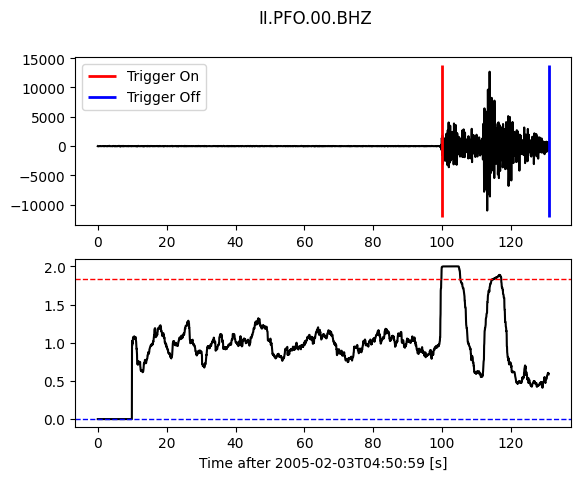

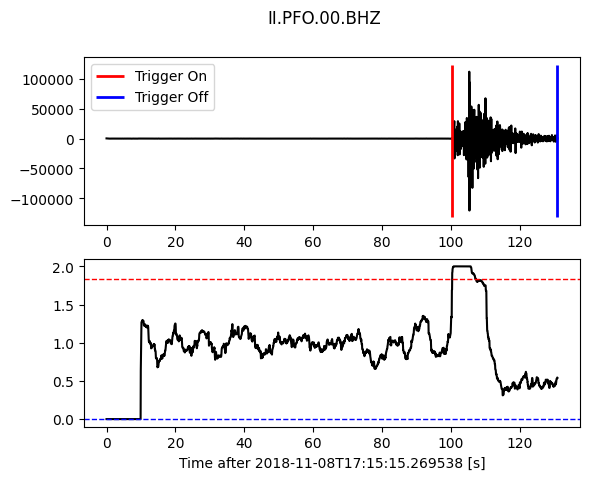

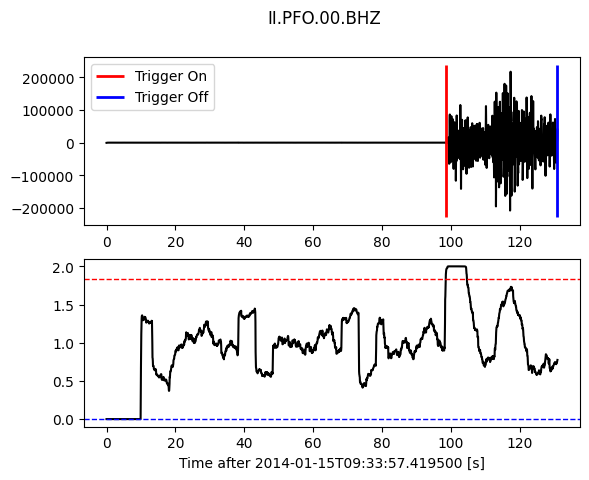

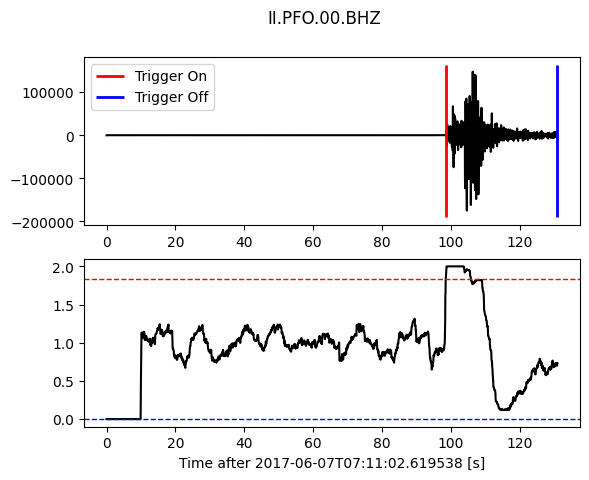

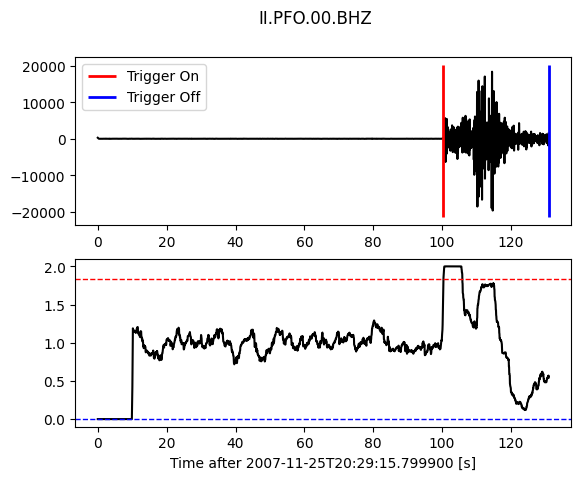

In [10]:
cft1 = obspy.signal.trigger.classic_sta_lta(tr1_filt.data, int(5 * df1), int(10 * df1))
obspy.signal.trigger.plot_trigger(tr1_filt, cft1, 1.84, 0.0)
cft2 = obspy.signal.trigger.classic_sta_lta(tr2_filt.data, int(5 * df2), int(10 * df2))
obspy.signal.trigger.plot_trigger(tr2_filt, cft2, 1.84, 0.0)
cft3 = obspy.signal.trigger.classic_sta_lta(tr3_filt.data, int(5 * df3), int(10 * df3))
obspy.signal.trigger.plot_trigger(tr3_filt, cft3, 1.84, 0.0)
cft4 = obspy.signal.trigger.classic_sta_lta(tr4_filt.data, int(5 * df4), int(10 * df4))
obspy.signal.trigger.plot_trigger(tr4_filt, cft4, 1.84, 0.0)
cft5 = obspy.signal.trigger.classic_sta_lta(tr5_filt.data, int(5 * df5), int(10 * df5))
obspy.signal.trigger.plot_trigger(tr5_filt, cft5, 1.84, 0.0)

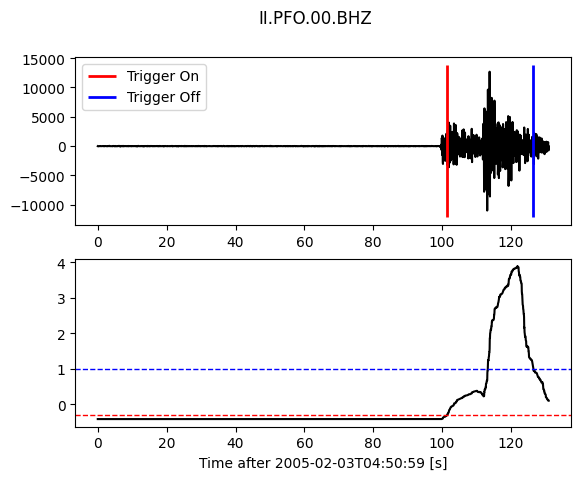

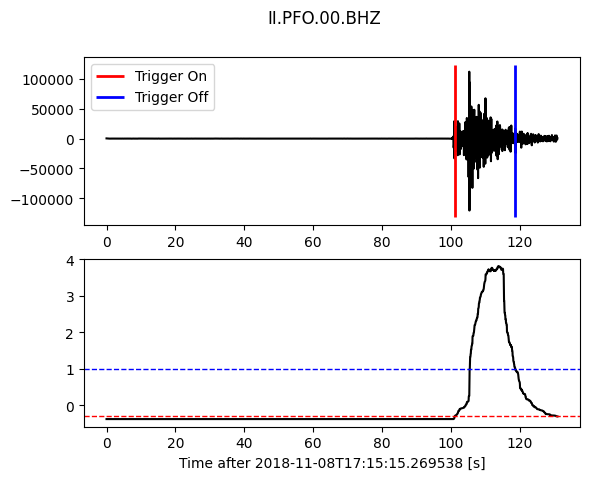

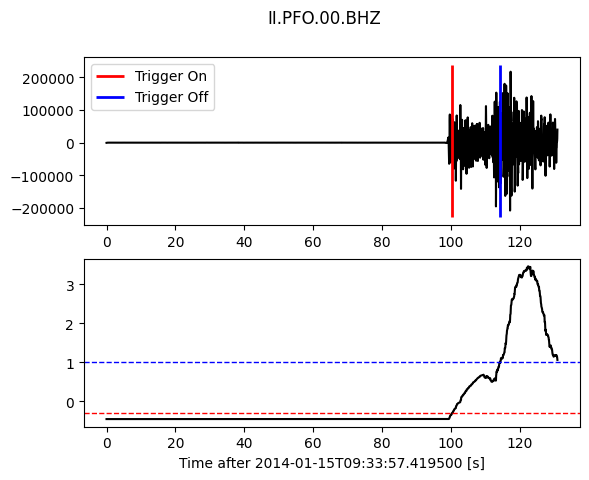

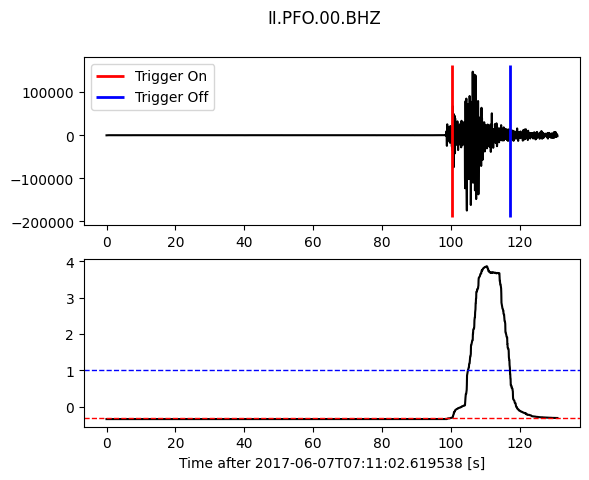

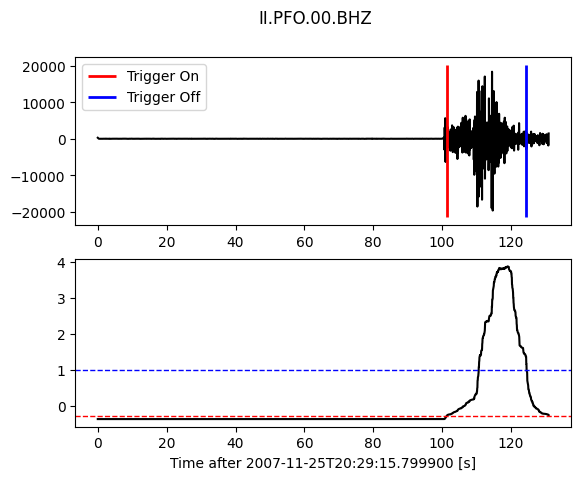

In [11]:
cft1 = obspy.signal.trigger.z_detect(tr1_filt.data, int(10 * df1))
obspy.signal.trigger.plot_trigger(tr1_filt, cft1, -0.3, 1)
cft2 = obspy.signal.trigger.z_detect(tr2_filt.data, int(10 * df2))
obspy.signal.trigger.plot_trigger(tr2_filt, cft2, -0.3, 1)
cft3 = obspy.signal.trigger.z_detect(tr3_filt.data, int(10 * df3))
obspy.signal.trigger.plot_trigger(tr3_filt, cft3, -0.3, 1)
cft4 = obspy.signal.trigger.z_detect(tr4_filt.data, int(10 * df4))
obspy.signal.trigger.plot_trigger(tr4_filt, cft4, -0.3, 1)
cft5 = obspy.signal.trigger.z_detect(tr5_filt.data, int(10 * df5))
obspy.signal.trigger.plot_trigger(tr5_filt, cft5, -0.3, 1)

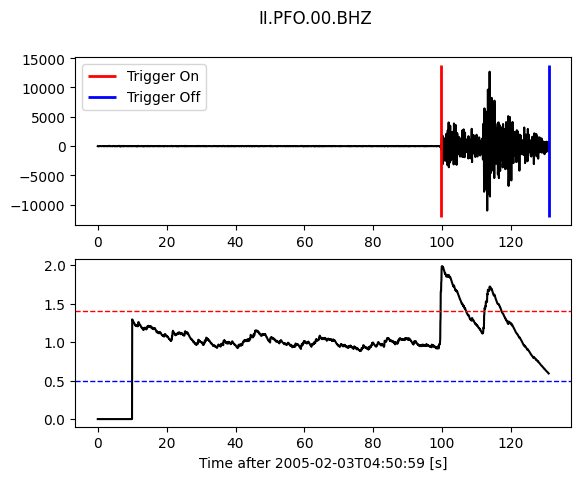

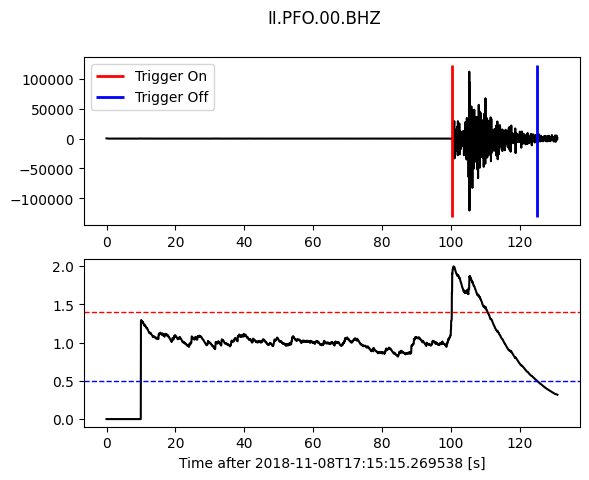

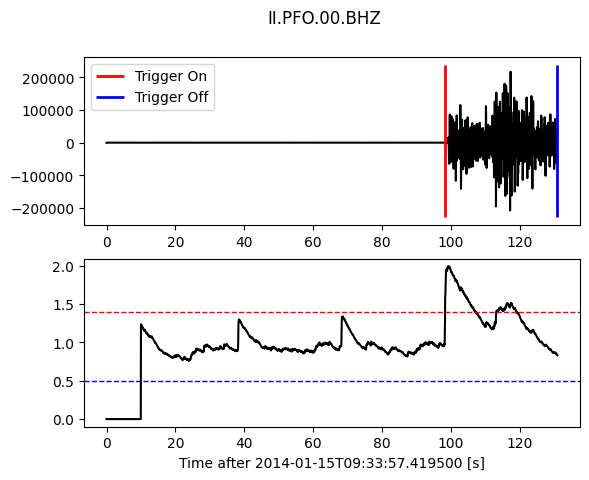

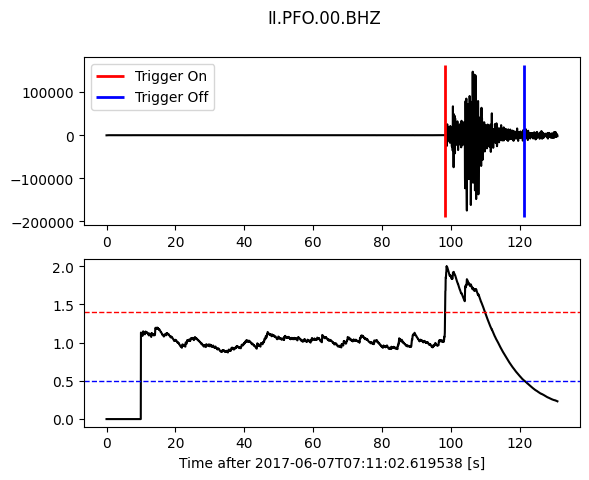

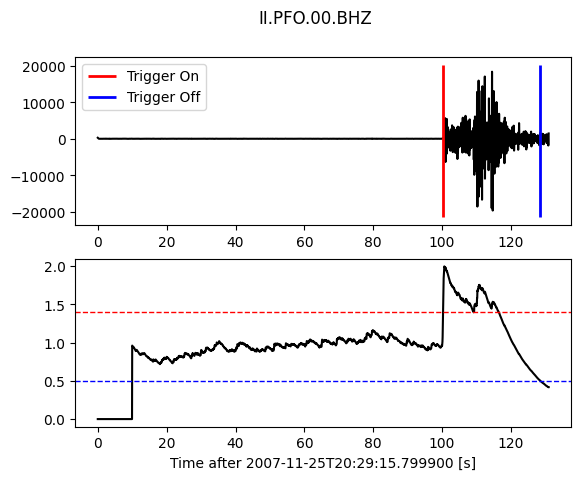

In [12]:
cft1 = obspy.signal.trigger.recursive_sta_lta(tr1_filt.data, int(5 * df1), int(10 * df1))
obspy.signal.trigger.plot_trigger(tr1_filt, cft1, 1.4, 0.5)
cft2 = obspy.signal.trigger.recursive_sta_lta(tr2_filt.data, int(5 * df2), int(10 * df2))
obspy.signal.trigger.plot_trigger(tr2_filt, cft2, 1.4, 0.5)
cft3 = obspy.signal.trigger.recursive_sta_lta(tr3_filt.data, int(5 * df3), int(10 * df3))
obspy.signal.trigger.plot_trigger(tr3_filt, cft3, 1.4, 0.5)
cft4 = obspy.signal.trigger.recursive_sta_lta(tr4_filt.data, int(5 * df4), int(10 * df4))
obspy.signal.trigger.plot_trigger(tr4_filt, cft4, 1.4, 0.5)
cft5 = obspy.signal.trigger.recursive_sta_lta(tr5_filt.data, int(5 * df5), int(10 * df5))
obspy.signal.trigger.plot_trigger(tr5_filt, cft5, 1.4, 0.5)

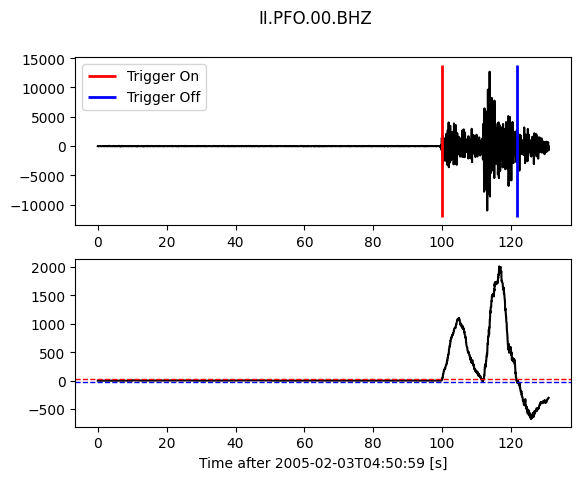

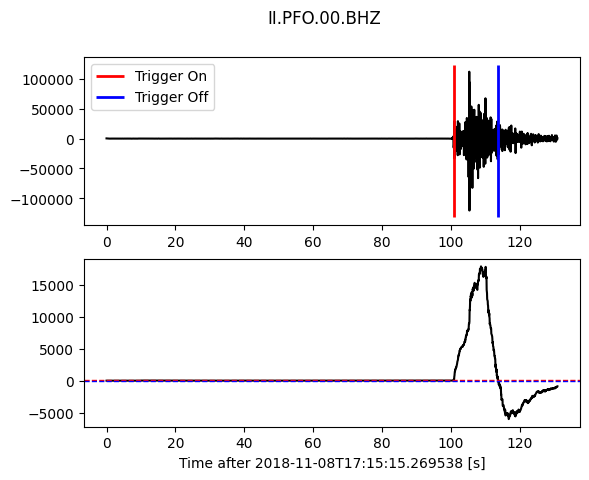

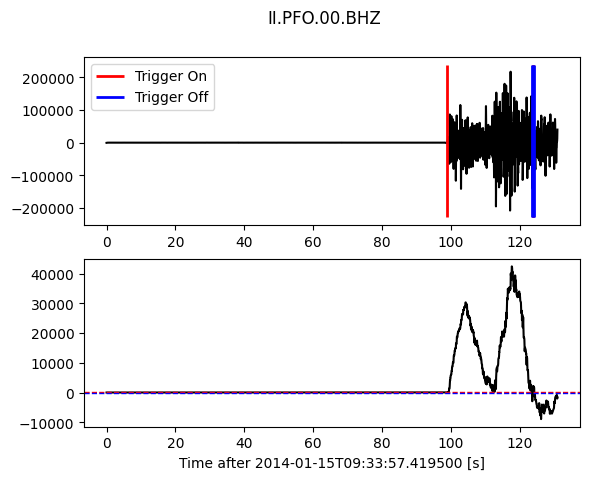

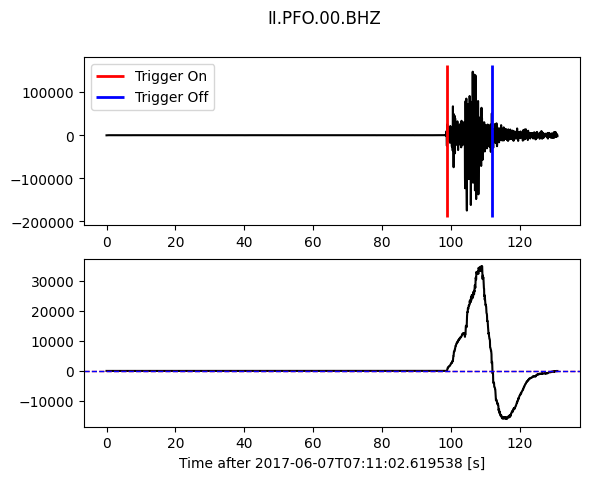

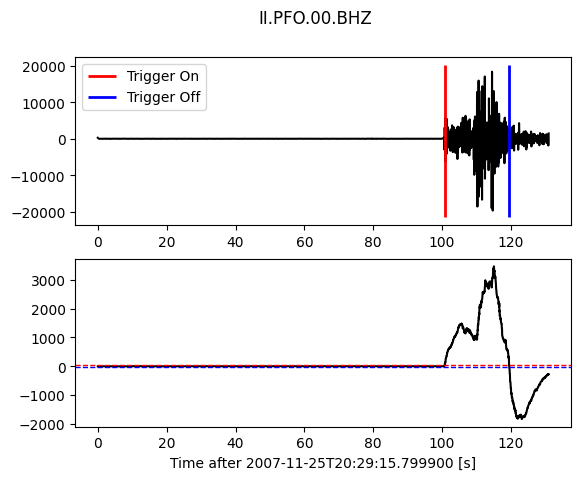

In [13]:
cft1 = obspy.signal.trigger.carl_sta_trig(tr1_filt.data, int(5 * df1), int(10 * df1), 0.8, 0.8)
obspy.signal.trigger.plot_trigger(tr1_filt, cft1, 30.0, -20.0)
cft2 = obspy.signal.trigger.carl_sta_trig(tr2_filt.data, int(5 * df2), int(10 * df2), 0.8, 0.8)
obspy.signal.trigger.plot_trigger(tr2_filt, cft2, 30.0, -20.0)
cft3 = obspy.signal.trigger.carl_sta_trig(tr3_filt.data, int(5 * df3), int(10 * df3), 0.8, 0.8)
obspy.signal.trigger.plot_trigger(tr3_filt, cft3, 30.0, -20.0)
cft4 = obspy.signal.trigger.carl_sta_trig(tr4_filt.data, int(5 * df4), int(10 * df4), 0.8, 0.8)
obspy.signal.trigger.plot_trigger(tr4_filt, cft4, 30.0, -20.0)
cft5 = obspy.signal.trigger.carl_sta_trig(tr5_filt.data, int(5 * df5), int(10 * df5), 0.8, 0.8)
obspy.signal.trigger.plot_trigger(tr5_filt, cft5, 30.0, -20.0)

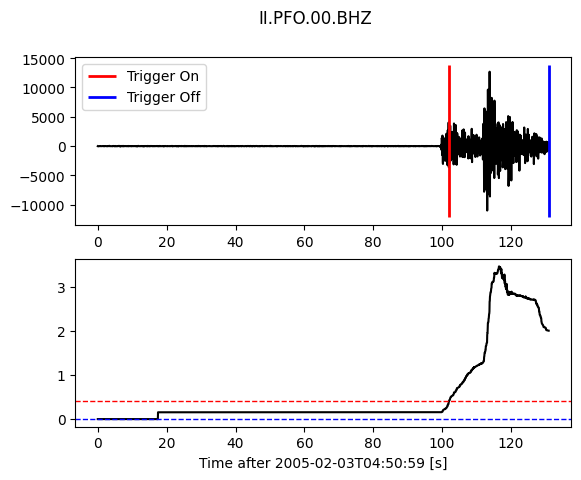

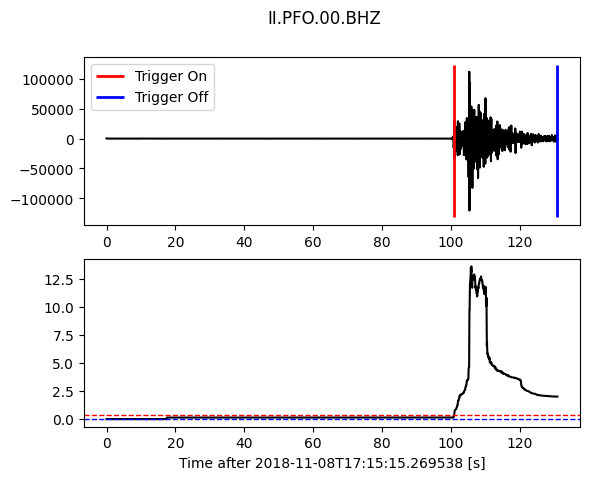

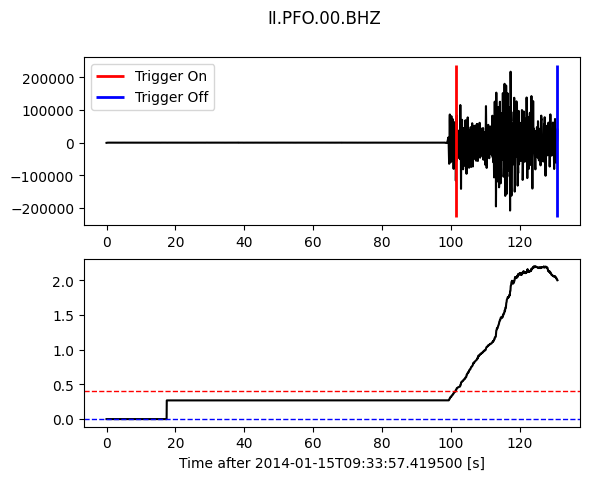

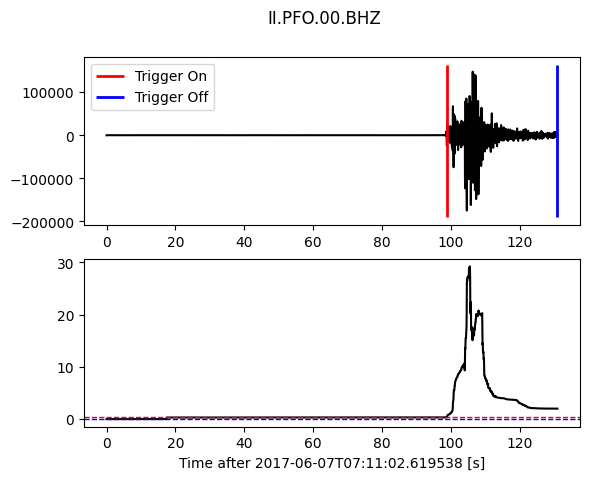

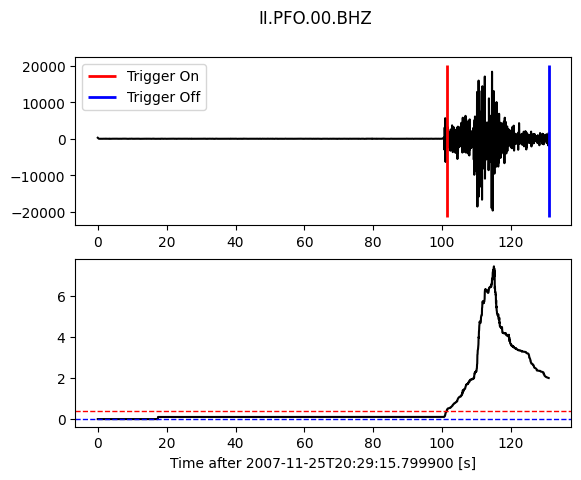

In [14]:
cft1 = obspy.signal.trigger.delayed_sta_lta(tr1_filt.data, int(5 * df1), int(10 * df1))
obspy.signal.trigger.plot_trigger(tr1_filt, cft1, 0.4, 0)
cft2 = obspy.signal.trigger.delayed_sta_lta(tr2_filt.data, int(5 * df2), int(10 * df2))
obspy.signal.trigger.plot_trigger(tr2_filt, cft2, 0.4, 0)
cft3 = obspy.signal.trigger.delayed_sta_lta(tr3_filt.data, int(5 * df3), int(10 * df3))
obspy.signal.trigger.plot_trigger(tr3_filt, cft3, 0.4, 0)
cft4 = obspy.signal.trigger.delayed_sta_lta(tr4_filt.data, int(5 * df4), int(10 * df4))
obspy.signal.trigger.plot_trigger(tr4_filt, cft4, 0.4, 0)
cft5 = obspy.signal.trigger.delayed_sta_lta(tr5_filt.data, int(5 * df5), int(10 * df5))
obspy.signal.trigger.plot_trigger(tr5_filt, cft5, 0.4, 0)

In [15]:
#Exemplo de event time
aux = cft1[cft1>=0.4][0]
ix = np.where(cft1==aux)
event_time = tr1_filt.times()[ix][0]
event_time

102.0